In [ ]:
import pandas as pd

df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dummy = pd.get_dummies(df['sex'])
dummy

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [ ]:
df = df.join(dummy)
df

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [ ]:
dummy = pd.get_dummies(df['smoker'])
df = df.join(dummy)
df

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0


In [ ]:
df.drop(['sex','smoker'],axis=1, inplace=True)
df

,age,bmi,children,region,charges,female,male,no,yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,1,0
1334,18,31.920,0,northeast,2205.98080,1,0,1,0
1335,18,36.850,0,southeast,1629.83350,1,0,1,0
1336,21,25.800,0,southwest,2007.94500,1,0,1,0


In [ ]:
df.drop('region',axis=1,inplace=True)

In [ ]:
#Standardisation et normalisation
vecteur = df['age'].values

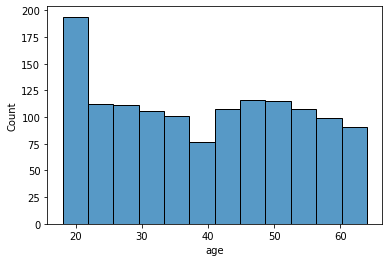

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
figure = plt.figure()
ax = sns.histplot(df,x='age')

In [ ]:
vecteur[0]

19

In [ ]:
#Get the data
y = df['charges'].values
x = df.drop('charges',axis=1).values
print(y[0])
print(x[0])

16884.924
[19.  27.9  0.   1.   0.   0.   1. ]


In [ ]:
#Normalisation des valeurs.
from sklearn.preprocessing import Normalizer
transform = Normalizer()
x = transform.fit_transform(x)
x

array([[0.56238375, 0.82581614, 0.        , ..., 0.        , 0.        ,
        0.02959914],
       [0.46989015, 0.88156613, 0.02610501, ..., 0.02610501, 0.02610501,
        0.        ],
       [0.64508595, 0.76027987, 0.06911635, ..., 0.02303878, 0.02303878,
        0.        ],
       ...,
       [0.43864325, 0.89800022, 0.        , ..., 0.        , 0.02436907,
        0.        ],
       [0.63070173, 0.77486213, 0.        , ..., 0.        , 0.03003342,
        0.        ],
       [0.90253427, 0.43010937, 0.        , ..., 0.        , 0.        ,
        0.01479564]])

In [ ]:
from sklearn.model_selection import train_test_split
###Partager le dataset en 3 (train, validation, test)
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,random_state=420,test_size=0.2)
Xtrain,Xval,ytrain,yval = train_test_split(Xtrain,ytrain,random_state=420,test_size=0.25)
##Préparer un modèle de régression avec neural network

##Analyser l'évolution du modèle.

In [ ]:
x.shape

(1338, 7)

In [ ]:
from tensorflow.keras.layers import Dense,Input
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential()
model.add(Input(7,))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 256)               2048      
                                                                 
 dense_39 (Dense)            (None, 256)               65792     
                                                                 
 dense_40 (Dense)            (None, 1)                 257       
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss="mean_absolute_percentage_error"
              ,metrics=['mae'])
history = model.fit(Xtrain,ytrain,batch_size=32,validation_data=(Xval,yval),epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 11ms/step - loss: 73.6227 - mae: 10879.6670 - val_loss: 58.7434 - val_mae: 8624.0625
Epoch 2/300
26/26 [==============================] - 0s 7ms/step - loss: 53.2807 - mae: 9272.5088 - val_loss: 45.4618 - val_mae: 6933.4429
Epoch 3/300
26/26 [==============================] - 0s 6ms/step - loss: 42.0055 - mae: 7638.9307 - val_loss: 37.9496 - val_mae: 6666.7617
Epoch 4/300
26/26 [==============================] - 0s 6ms/step - loss: 36.7330 - mae: 7117.4170 - val_loss: 37.5676 - val_mae: 7021.1177
Epoch 5/300
26/26 [==============================] - 0s 5ms/step - loss: 34.8313 - mae: 6852.3110 - val_loss: 37.7557 - val_mae: 6154.1704
Epoch 6/300
26/26 [==============================] - 0s 5ms/step - loss: 34.1605 - mae: 6689.8462 - val_loss: 33.1735 - val_mae: 6104.8887
Epoch 7/300
26/26 [==============================] - 0s 6ms/step - loss: 31.0637 - mae: 6271.1440 - val_loss: 30.8864 - val_mae: 5657.9160
Epoch 8/300
26/26 [======

In [ ]:
def plot_loss(history):
  plt.plot(history.history['mae'], label='loss')
  plt.plot(history.history['val_mae'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [insurance]')
  plt.legend()
  plt.grid(True)


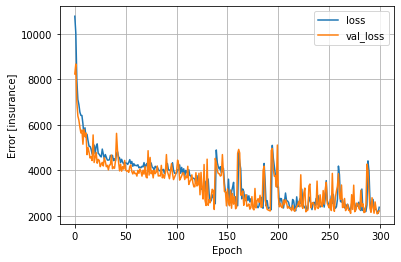

In [ ]:
plot_loss(history)

In [ ]:
##On va evaluer le model
y_test_pred = model.predict(Xtrain)
for i in range(10):
  print("y réel : {}  y prédit {}".format(ytest[i],y_test_pred[i][0]))

26/26 [==============================] - 0s 1ms/step
y réel : 7742.1098  y prédit 6785.5859375
y réel : 18259.216  y prédit 14295.8095703125
y réel : 12142.5786  y prédit 13048.765625
y réel : 19749.38338  y prédit 12091.9716796875
y réel : 9095.06825  y prédit 1463.4013671875
y réel : 10594.2257  y prédit 4743.85107421875
y réel : 6082.405  y prédit 41265.46484375
y réel : 20773.62775  y prédit 32163.486328125
y réel : 42560.4304  y prédit 11560.69921875
y réel : 2254.7967  y prédit 9438.62890625
